In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adas754","key":"6f1fc5ba50f3e264c2c139898e2e7c37"}'}

In [2]:
!mkdir -p ~/.Kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [17]:
!kaggle datasets download -d valentynsichkar/traffic-signs-dataset-in-yolo-format

 96% 241M/250M [00:03<00:00, 93.8MB/s]
100% 250M/250M [00:03<00:00, 81.4MB/s]


In [18]:
import os

In [19]:
os.system('apt-get install p7zip')

0

In [20]:
from zipfile import ZipFile
file_name="/content/traffic-signs-dataset-in-yolo-format.zip"
with ZipFile(file_name,'r')as zip:
  zip.extractall()
  print('Done')

Done


In [21]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [22]:
data_dir = "/content/gtsrb-german-traffic-sign.zip"
train_path = '/content/Train'
test_path = '/content/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [9]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [10]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [11]:
data = []
labels = []
classes = 43
current_path = os.getcwd()

In [15]:
current_path = "/content/meta"

In [23]:
# download dataset repository
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
Unpacking objects: 100% (6/6), done.


In [24]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
import cv2

In [27]:
np.random.seed(0)

In [28]:
# import pickle dataset file
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
  
X_train , y_train = train_data['features'], train_data['labels']
X_val , y_val = val_data['features'], val_data['labels']
X_test , y_test = test_data['features'], test_data['labels']

In [29]:
print("X_train shape = ",X_train.shape)
print("X_val shape = ",X_val.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (34799, 32, 32, 3)
X_val shape =  (4410, 32, 32, 3)
X_test shape =  (12630, 32, 32, 3)


In [30]:
assert(X_train.shape[0] == y_train.shape[0]), "No. of Images is not equals to number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "No. of Images is not equals to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "No. of Images is not equals to number of labels"

assert(X_train.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"

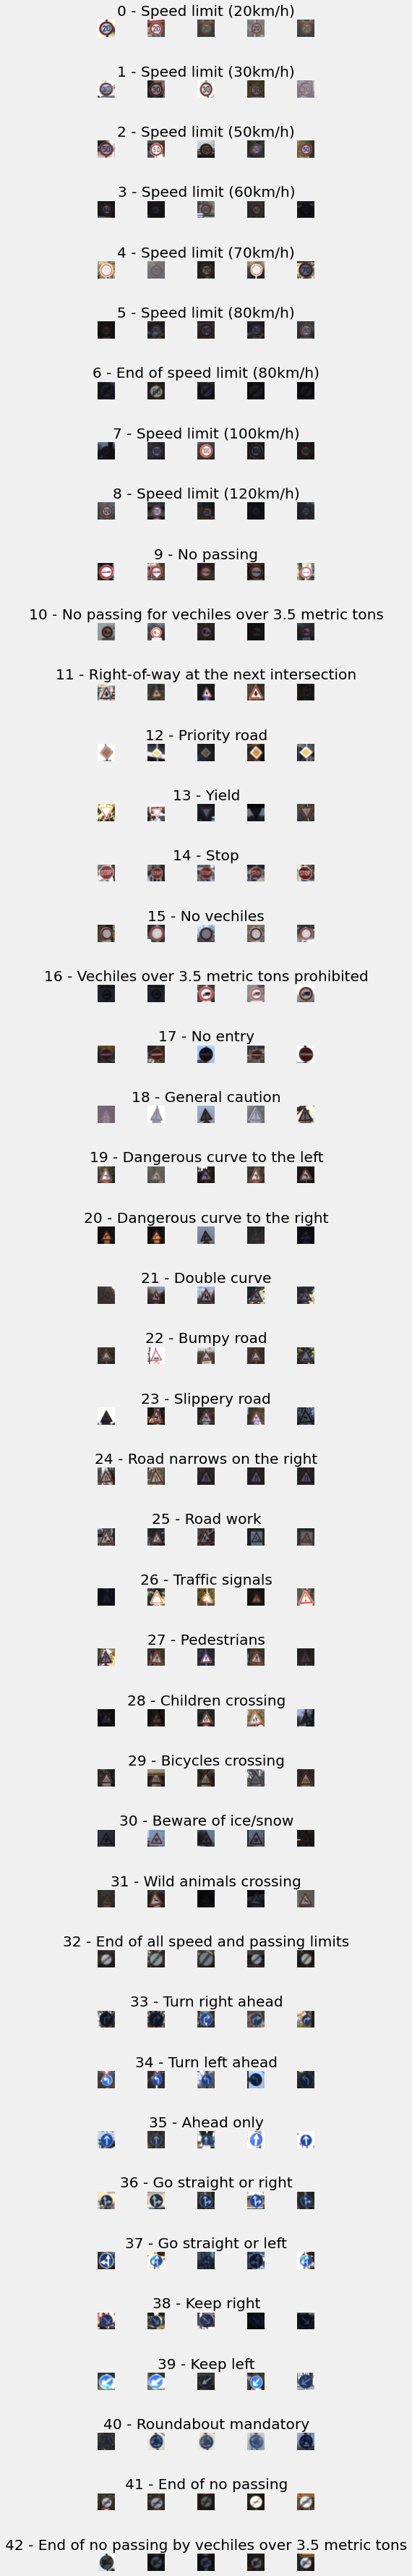

In [31]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
#print(data)

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


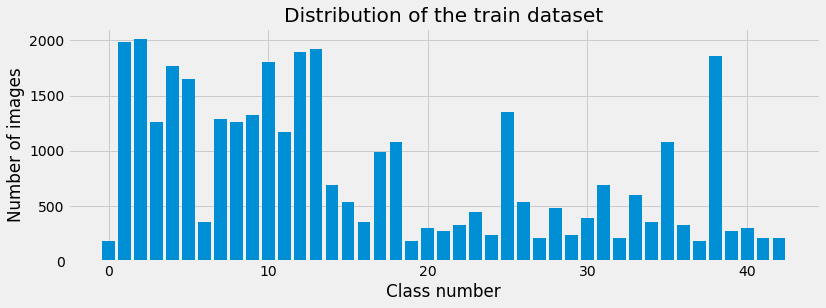

In [32]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
1


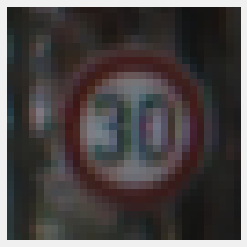

In [33]:
Test = 2323
plt.imshow(X_train[Test])
plt.axis("off")
print(X_train[Test].shape)
print(y_train[Test])

(32, 32)


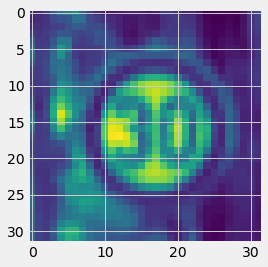

In [34]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[Test])
plt.imshow(img)
#plt.axis("off")
print(img.shape)

(32, 32)


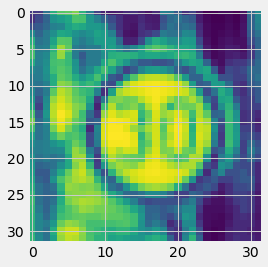

In [35]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img


img = equalize(img)
plt.imshow(img)
print(img.shape)

In [36]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  #normalize the images, i.e. convert the pixel values to fit btwn 0 and 1
  img = img/255
  return img

In [37]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


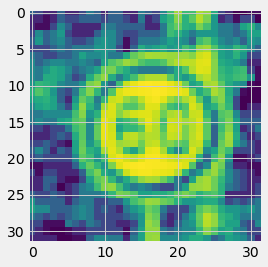

In [38]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
print(X_train.shape)

In [39]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [40]:
from keras.preprocessing.image import ImageDataGenerator

# data Aug
datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

(15, 32, 32, 1)


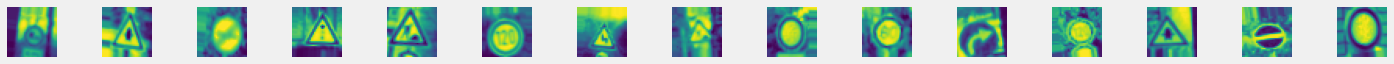

In [41]:
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

print(X_batch.shape)

In [42]:
print("X_train shape = ",X_train.shape)
print("X_val shape = ",X_val.shape)
print("X_test shape = ",X_test.shape)

X_train shape =  (34799, 32, 32, 1)
X_val shape =  (4410, 32, 32, 1)
X_test shape =  (12630, 32, 32, 1)


In [43]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [44]:
def better_model():
  model = Sequential()

  model.add(Conv2D(60,(5,5), input_shape= (32,32,1), activation = 'relu'))
  model.add(Conv2D(60,(5,5), input_shape= (32,32,1), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(30, (3, 3) , activation = 'relu'))
  model.add(Conv2D(30, (3, 3) , activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  
  #Compile Model  
  model.compile(Adam(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [45]:
model = better_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [46]:
batch_size=100
steps_per_epoch = X_train.shape[0]//batch_size

In [48]:
# define our training paramters
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=steps_per_epoch,
                            epochs=40,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/40
347/347 [==============================] - 13s 38ms/step - loss: 0.0941 - accuracy: 0.9710 - val_loss: 0.0642 - val_accuracy: 0.9862
Epoch 2/40
347/347 [==============================] - 13s 39ms/step - loss: 0.0885 - accuracy: 0.9720 - val_loss: 0.0417 - val_accuracy: 0.9887
Epoch 3/40
347/347 [==============================] - 13s 38ms/step - loss: 0.0825 - accuracy: 0.9741 - val_loss: 0.0365 - val_accuracy: 0.9914
Epoch 4/40
347/347 [==============================] - 13s 38ms/step - loss: 0.0900 - accuracy: 0.9719 - val_loss: 0.0320 - val_accuracy: 0.9907
Epoch 5/40
347/347 [==============================] - 13s 39ms/step - loss: 0.0794 - accuracy: 0.9758 - val_loss: 0.0314 - val_accuracy: 0.9914
Epoch 6/40
347/347 [==============================] - 13s 39ms/step - loss: 0.0855 - accuracy: 0.9733 - val_loss: 0.0540 - val_accuracy: 0.9873
Epoch 7/40
347/347 [==============================] - 13s 38ms/step - loss: 0.0781 - accuracy: 0.9768 - val_loss: 0.0557 - val_accuracy:

Text(0.5, 0, 'epoch')

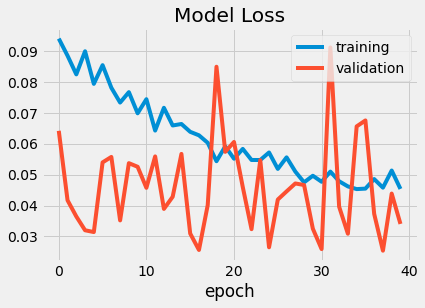

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

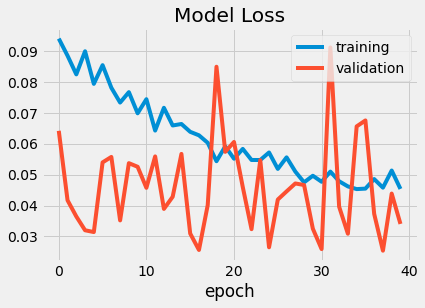

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch')

In [51]:
score = model.evaluate(X_test, y_test , verbose = 0)
print("The test score is: ",score[0])
print("The Accuracy score is: ",score[1])

The test score is:  0.1174364909529686
The Accuracy score is:  0.9751385450363159


In [52]:
#save model
model.save("traffic model.h5")

In [53]:
'''ClassId,SignName
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)
9,No passing
10,No passing for vehicles over 3.5 metric tons
11,Right-of-way at the next intersection
12,Priority road
13,Yield
14,Stop
15,No vehicles
16,Vehicles over 3.5 metric tons prohibited
17,No entry
18,General caution
19,Dangerous curve to the left
20,Dangerous curve to the right
21,Double curve
22,Bumpy road
23,Slippery road
24,Road narrows on the right
25,Road work
26,Traffic signals
27,Pedestrians
28,Children crossing
29,Bicycles crossing
30,Beware of ice/snow
31,Wild animals crossing
32,End of all speed and passing limits
33,Turn right ahead
34,Turn left ahead
35,Ahead only
36,Go straight or right
37,Go straight or left
38,Keep right
39,Keep left
40,Roundabout mandatory
41,End of no passing
42,End of no passing by vehicles over 3.5 metric tons'''

'ClassId,SignName\n0,Speed limit (20km/h)\n1,Speed limit (30km/h)\n2,Speed limit (50km/h)\n3,Speed limit (60km/h)\n4,Speed limit (70km/h)\n5,Speed limit (80km/h)\n6,End of speed limit (80km/h)\n7,Speed limit (100km/h)\n8,Speed limit (120km/h)\n9,No passing\n10,No passing for vehicles over 3.5 metric tons\n11,Right-of-way at the next intersection\n12,Priority road\n13,Yield\n14,Stop\n15,No vehicles\n16,Vehicles over 3.5 metric tons prohibited\n17,No entry\n18,General caution\n19,Dangerous curve to the left\n20,Dangerous curve to the right\n21,Double curve\n22,Bumpy road\n23,Slippery road\n24,Road narrows on the right\n25,Road work\n26,Traffic signals\n27,Pedestrians\n28,Children crossing\n29,Bicycles crossing\n30,Beware of ice/snow\n31,Wild animals crossing\n32,End of all speed and passing limits\n33,Turn right ahead\n34,Turn left ahead\n35,Ahead only\n36,Go straight or right\n37,Go straight or left\n38,Keep right\n39,Keep left\n40,Roundabout mandatory\n41,End of no passing\n42,End of n

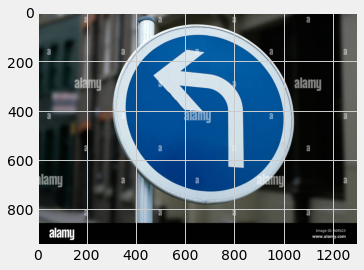

In [54]:
#fetch image
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


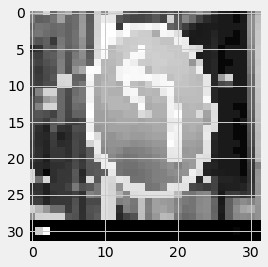

In [55]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [56]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)
print("The Predicted Sign: "+str(np.argmax(model.predict(img), axis=-1)))

The Predicted Sign: [12]


In [57]:
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model # deletes the existing model

In [58]:
# returns a compiled model
model = load_model('my_model.h5')

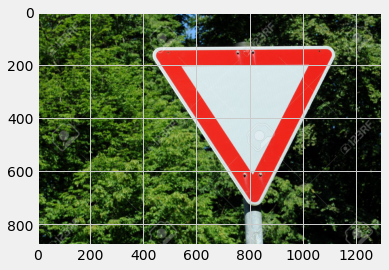

In [59]:
#Testing the Saved Model
#fetch image
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


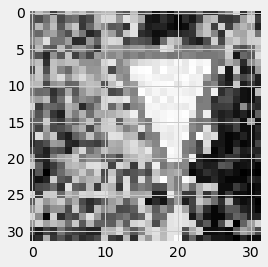

In [60]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [61]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)
print("The Predicted Sign: "+str(np.argmax(model.predict(img), axis=-1)))

The Predicted Sign: [13]


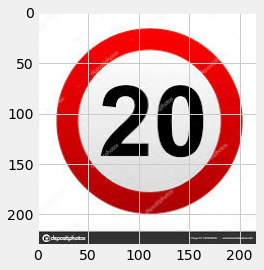

In [62]:
#Testing the Saved Model

#fetch image
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAsQqZfuSKrMLh0u1TS2hplSnqG1UFgLjuIg&usqp=CAU'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


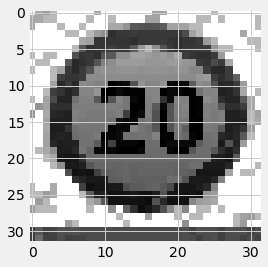

In [63]:
#Preprocess image
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [64]:
#Reshape reshape
img = img.reshape(1, 32, 32, 1)
print("The Predicted Sign: "+str(np.argmax(model.predict(img), axis=-1)))

The Predicted Sign: [0]


In [66]:
!pip install pyttsx3